In [ ]:
pip install scdreamer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=80d4d4c012512bba72a59e46c367a258b8c6c6acf812c71d59c81214ffda50fd
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.7 MB/s eta 0:00:00


In [ ]:
pip install igraph

In [ ]:
pip install scipy

In [ ]:
#Load packages#
import tempfile
import scanpy as sc
import pandas as pd
import os

#read in raw data from mathbiou folder
adata = sc.read_h5ad('/content/drive/MyDrive/Data_for_RNASEQ/3_4_e9_e10.h5ad')

In [ ]:
!pip install --user scikit-misc
import numpy


barcodes = pd.read_csv('/content/drive/MyDrive/Data_for_RNASEQ/Nima/trajectory.csv')
barcodes = barcodes.Barcode
adata = adata[adata.obs['barcode'].isin(barcodes)]

sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    #Ensure the n_top_genes (HVG's) are set to an appropriate value for desired datasets, i.e. the complexity of celltypes/data
    n_top_genes=1000,
    layer="counts",
    batch_key="batch_key",
    subset=False,
    span = 1
)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


TypeError: Cannot convert numpy.ndarray to numpy.ndarray

In [ ]:
#Remove reporter/uninformative genes from highly variable genes if applicable
genes_to_remove = ['eGFP','tdTomato']
adata.var['highly_variable'] = ~adata.var.index.isin(genes_to_remove) & adata.var['highly_variable']
#Save adata prior to subsetting to HvG's
adata.write('/content/drive/MyDrive/Data_for_RNASEQ/Parth/3_4_pseudotime_integrated.h5ad')
#Subset to HvG's
adata = adata[:, adata.var.highly_variable]

#Here we save the newly formatted merged data before integration so we can use it for other integration methods
adata.write('/content/drive/MyDrive/Data_for_RNASEQ/Parth/3_4_pseudotime_hvg.h5ad')


KeyError: 'highly_variable'

In [ ]:
#load packages
import warnings
warnings.filterwarnings('ignore')

import os
import scanpy as sc
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import random
import numpy as np
import tensorflow as tf2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Specify name of the datset to run
path = "/content/drive/MyDrive/Data_for_RNASEQ/Parth/3_4_pseudotime_subset_hvg.h5ad"
name = "3_4_pseudotime_hvg"

data_path = {
    "3_4_pseudotime_subset_hvg": path,
}

batch_key_dict = {
    "3_4_pseudotime_subset_hvg": "batch_key",
}
cell_type_key_dict = {
    "3_4_pseudotime_subset_hvg": "celltype",
}

# Leaning rate to use for small data vs large input data
learning_rate = {
    "3_4_pseudotime_subset_hvg": {"lr_ae" : 0.0002, "lr_dis": 0.0007},
}

#scDREAMER
from scDREAMER import scDREAMER
tf.reset_default_graph()

run_config = tf.ConfigProto()


with tf.Session(config=run_config) as sess:

    dreamer = scDREAMER(
        sess,
	      epoch= 240,
        dataset_name=data_path[name],
        batch=batch_key_dict[name],
        cell_type=cell_type_key_dict[name],
        name=name,
        lr_ae=learning_rate[name]["lr_ae"],
        lr_dis=learning_rate[name]["lr_dis"],
        X_dim = 999
      )
    dreamer.sess = sess
    dreamer.train_cluster()

Reading data
encoder input shape  Tensor("concat:0", shape=(?, 1004), dtype=float32)
decoder input shape  Tensor("concat_2:0", shape=(?, 15), dtype=float32)
KL gaussian z Tensor("mul_10:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_9:0", shape=(?,), dtype=float32)
scDREAMER on DataSet /content/drive/MyDrive/Data_for_RNASEQ/Parth/3_4_pseudotime_hvg.h5ad ... 
Epoch : [0] ,  a_loss = 559.4554
Epoch : [10] ,  a_loss = 354.2958
Epoch : [20] ,  a_loss = 341.4097
Epoch : [30] ,  a_loss = 332.3700
Epoch : [40] ,  a_loss = 325.0164
Epoch : [50] ,  a_loss = 318.7449
Epoch : [60] ,  a_loss = 313.3440
Epoch : [70] ,  a_loss = 308.5301
Epoch : [80] ,  a_loss = 304.4091
Epoch : [90] ,  a_loss = 300.7354
Epoch : [100] ,  a_loss = 297.3938
Epoch : [110] ,  a_loss = 294.4086
Epoch : [120] ,  a_loss = 291.8229
Epoch : [130] ,  a_loss = 289.5697
Epoch : [140] ,  a_loss = 287.6410
Epoch : [150] ,  a_loss = 285.8160
Epoch : [160] ,  a_loss = 284.3316
Epoch : [170] ,  a_loss = 282.8894
Epoch : [1

CELL RANK

In [ ]:
import sys

if "google.colab" in sys.modules:
    !pip install -q git+https://github.com/theislab/cellrank

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━

In [ ]:
import cellrank as cr
import scanpy as sc

sc.settings.set_figure_params(frameon=False, dpi=100)
cr.settings.verbosity = 2

In [ ]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)

In [ ]:
adata = sc.read_h5ad('/content/drive/MyDrive/Data_for_RNASEQ/Parth/integrated_mathexplr.h5ad')



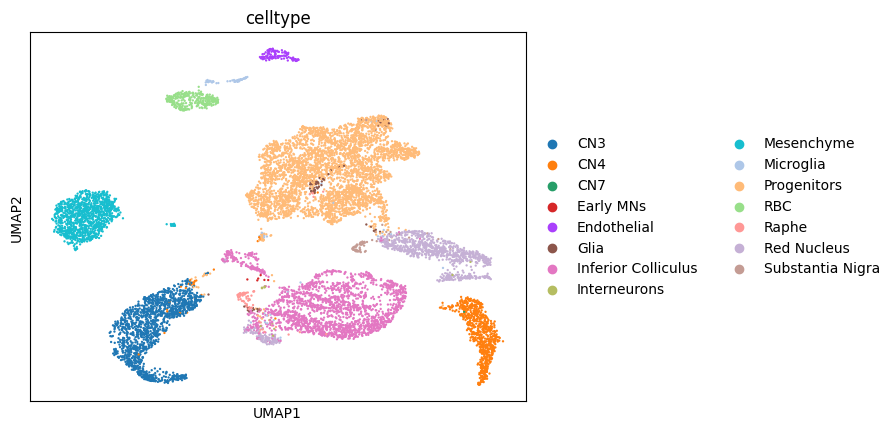

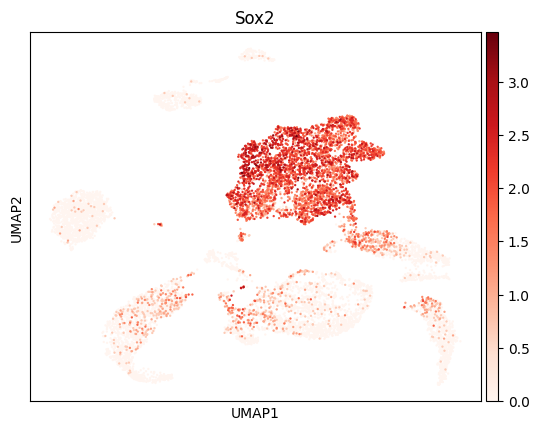

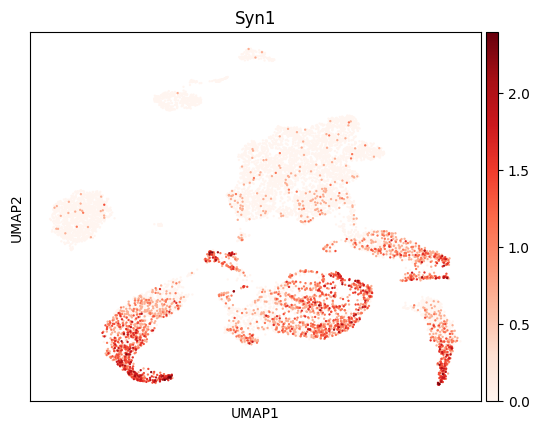

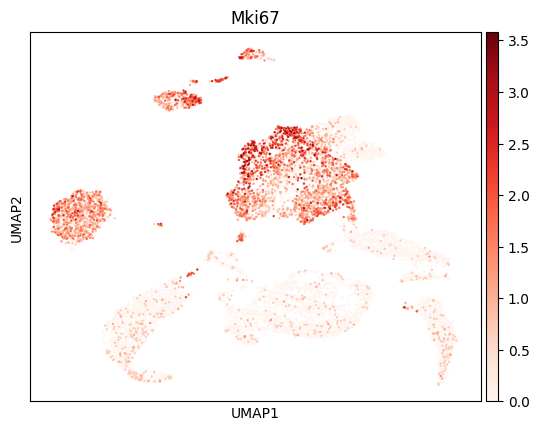

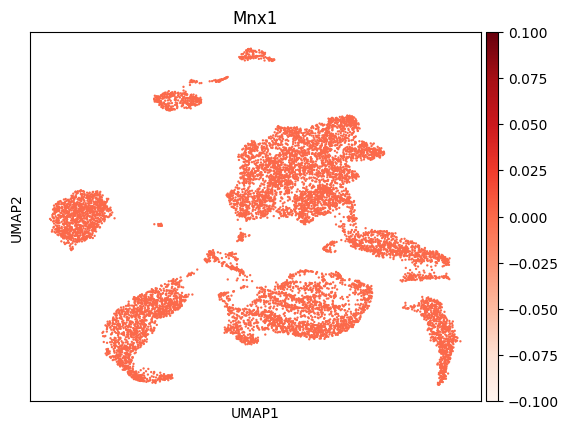

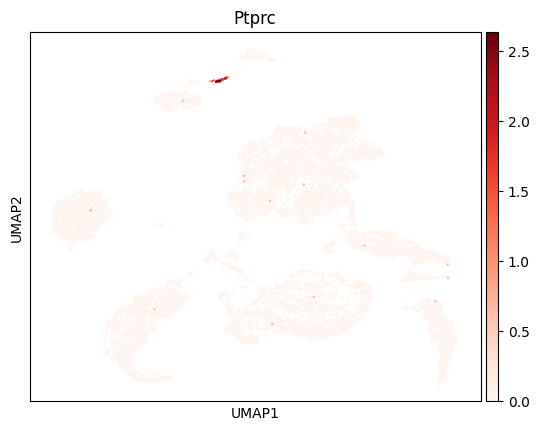

In [ ]:
sc.pl.umap(adata, color="celltype")


# Progenitors
sc.pl.umap(adata, color="Sox2", cmap="Reds")
# Neurons
sc.pl.umap(adata, color="Syn1", cmap="Reds")
# Dividing Progenitors
sc.pl.umap(adata, color="Mki67", cmap="Reds")

sc.pl.umap(adata, color="Mnx1", cmap="Reds")

# Microglia
sc.pl.umap(adata, color="Ptprc", cmap="Reds")

# WHY DOES MICROGLIA NOT WORK?? ALSO WHY DOES CN6 NOT WORK??????!?!?!?!

#Macrophage, DOESN'T WORK????
#sc.pl.umap(adata, color="CD45", cmap="Reds")

In [ ]:
adata = adata[:, adata.var["palantir"]].copy()
adata.layers["MAGIC_imputed_data"] = adata.obsm["MAGIC_imputed_data"].copy()

KeyError: 'palantir'

Load_csv.py

In [ ]:
import scanpy as sc
import pandas as pd

#Load dataset prior to subsetting to HvGs
adata = sc.read_h5ad('/content/drive/MyDrive/Data_for_RNASEQ/Parth/3_4_pseudotime_integrated.h5ad')

#Load latent matrix created from scDREAMER
latent_matrix = pd.read_csv("/content/3_4_pseudotime_hvglatent_matrix_240.csv", header=None)
adata.obsm['X_latent'] = latent_matrix.values
sc.pp.neighbors(adata, use_rep = 'X_latent')
sc.tl.umap(adata)  # Assuming 'X_latent' is the key you used to store the latent space
sc.tl.leiden(adata, resolution = .2)

#Save fully integrated dataset
adata.write('/content/drive/MyDrive/Data_for_RNASEQ/Parth/integrated_mathexplr.h5ad')

KeyboardInterrupt: 